In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64ba769c519bb2ddd723f1c4ee3de8c0


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | crab hill
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | concepcion del uruguay
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | kuche
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | paka
Processing Record 13 of Set 1 | pulivendla
Processing Record 14 of Set 1 | kaeo
Processing Record 15 of Set 1 | marv dasht
City not found. Skipping...
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | doka
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | bethel
Processing 

Processing Record 36 of Set 4 | barawe
City not found. Skipping...
Processing Record 37 of Set 4 | ulladulla
Processing Record 38 of Set 4 | geraldton
Processing Record 39 of Set 4 | half moon bay
Processing Record 40 of Set 4 | phalaborwa
Processing Record 41 of Set 4 | le port
Processing Record 42 of Set 4 | port hardy
Processing Record 43 of Set 4 | san policarpo
Processing Record 44 of Set 4 | necochea
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | urusha
Processing Record 47 of Set 4 | sorong
Processing Record 48 of Set 4 | prince albert
Processing Record 49 of Set 4 | cururupu
Processing Record 50 of Set 4 | natchez
Processing Record 1 of Set 5 | tilichiki
Processing Record 2 of Set 5 | miramar
Processing Record 3 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 4 of Set 5 | lorengau
Processing Record 5 of Set 5 | nyagan
Processing Record 6 of Set 5 | port macquarie
Processing Record 7 of Set 5 | aktash
Processing Record 8 of Set 5 | mo

Processing Record 26 of Set 8 | pine bluff
Processing Record 27 of Set 8 | adrar
Processing Record 28 of Set 8 | okhotsk
Processing Record 29 of Set 8 | xadani
City not found. Skipping...
Processing Record 30 of Set 8 | mogzon
Processing Record 31 of Set 8 | furano
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | yatou
Processing Record 34 of Set 8 | aloleng
Processing Record 35 of Set 8 | saint-raphael
Processing Record 36 of Set 8 | berlevag
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | road town
Processing Record 39 of Set 8 | mazkeret batya
Processing Record 40 of Set 8 | jinka
Processing Record 41 of Set 8 | boulder city
Processing Record 42 of Set 8 | harnosand
Processing Record 43 of Set 8 | la ronge
Processing Record 44 of Set 8 | panguna
Processing Record 45 of Set 8 | jalu
Processing Record 46 of Set 8 | malartic
Processing Record 47 of Set 8 | wegrow
Processing Record 48 of Set 8 | mahanoro
Processing Record 49 of Set 8 | noy

Processing Record 15 of Set 12 | yar-sale
Processing Record 16 of Set 12 | chagda
City not found. Skipping...
Processing Record 17 of Set 12 | dawei
Processing Record 18 of Set 12 | ulagan
Processing Record 19 of Set 12 | constitucion
Processing Record 20 of Set 12 | tambopata
Processing Record 21 of Set 12 | luwuk
Processing Record 22 of Set 12 | alyangula
Processing Record 23 of Set 12 | beidao
Processing Record 24 of Set 12 | illela
Processing Record 25 of Set 12 | lingao
Processing Record 26 of Set 12 | kargil
Processing Record 27 of Set 12 | leua
Processing Record 28 of Set 12 | digby
Processing Record 29 of Set 12 | great falls
Processing Record 30 of Set 12 | bereda
Processing Record 31 of Set 12 | zeya
Processing Record 32 of Set 12 | usinsk
Processing Record 33 of Set 12 | mareeba
Processing Record 34 of Set 12 | holme
Processing Record 35 of Set 12 | high level
Processing Record 36 of Set 12 | port lincoln
Processing Record 37 of Set 12 | leningradskiy
Processing Record 38 of

In [11]:
len(city_data)

588

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,68.90,79,38,12.64,ZA,2021-11-11 18:25:36
1,Iqaluit,63.7506,-68.5145,10.13,72,40,3.00,CA,2021-11-11 18:25:37
2,Kapaa,22.0752,-159.3190,73.72,82,40,4.61,US,2021-11-11 18:25:37
3,Esperance,-33.8667,121.9000,51.64,61,90,15.37,AU,2021-11-11 18:25:37
4,Concepcion Del Uruguay,-32.4825,-58.2372,81.99,35,1,8.01,AR,2021-11-11 18:25:38
5,Victoria,22.2855,114.1577,72.32,55,98,3.00,HK,2021-11-11 18:25:38
6,Yellowknife,62.4560,-114.3525,32.41,89,90,12.66,CA,2021-11-11 18:25:38
7,Ushuaia,-54.8000,-68.3000,58.66,44,40,14.97,AR,2021-11-11 18:25:39
8,Paka,4.6374,103.4368,76.93,94,100,0.00,MY,2021-11-11 18:25:39
9,Pulivendla,14.4167,78.2333,67.05,94,100,9.89,IN,2021-11-11 18:25:40


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-11-11 18:25:36,-34.4187,19.2345,68.90,79,38,12.64
1,Iqaluit,CA,2021-11-11 18:25:37,63.7506,-68.5145,10.13,72,40,3.00
2,Kapaa,US,2021-11-11 18:25:37,22.0752,-159.3190,73.72,82,40,4.61
3,Esperance,AU,2021-11-11 18:25:37,-33.8667,121.9000,51.64,61,90,15.37
4,Concepcion Del Uruguay,AR,2021-11-11 18:25:38,-32.4825,-58.2372,81.99,35,1,8.01
5,Victoria,HK,2021-11-11 18:25:38,22.2855,114.1577,72.32,55,98,3.00
6,Yellowknife,CA,2021-11-11 18:25:38,62.4560,-114.3525,32.41,89,90,12.66
7,Ushuaia,AR,2021-11-11 18:25:39,-54.8000,-68.3000,58.66,44,40,14.97
8,Paka,MY,2021-11-11 18:25:39,4.6374,103.4368,76.93,94,100,0.00
9,Pulivendla,IN,2021-11-11 18:25:40,14.4167,78.2333,67.05,94,100,9.89


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/11/21'

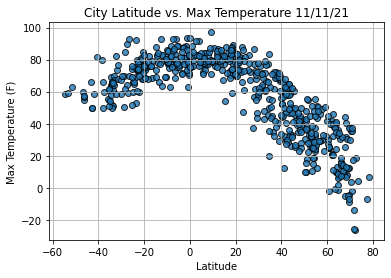

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

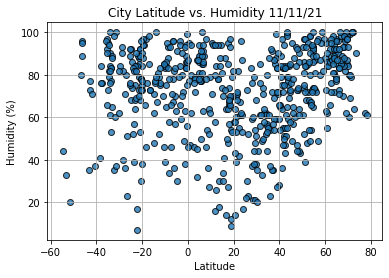

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

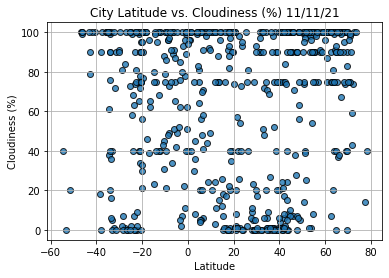

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

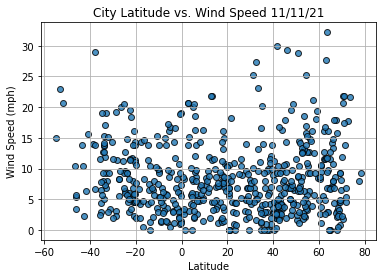

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()